In [52]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

In [53]:
data = sns.load_dataset("tips")
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
# Goal: To train an AI to predict the tip from the total bill

In [55]:
features = data[['total_bill']]
tip = data['tip']

from sklearn import linear_model
f = linear_model.LinearRegression(fit_intercept = False)  # create linear regression model
f.fit(features,tip)

LinearRegression(fit_intercept=False)

In [56]:
f.predict([[100]])

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([14.37318953])

In [57]:
f.predict([[70]])

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([10.06123267])

In [58]:
# add predictions to dataframe for later plotting
data['prediction'] = f.predict(features)  # prediction is the predicted tip.

In [59]:
data

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.172537
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.906633
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.258402
242,17.82,1.75,Male,No,Sat,Dinner,2,2.561302


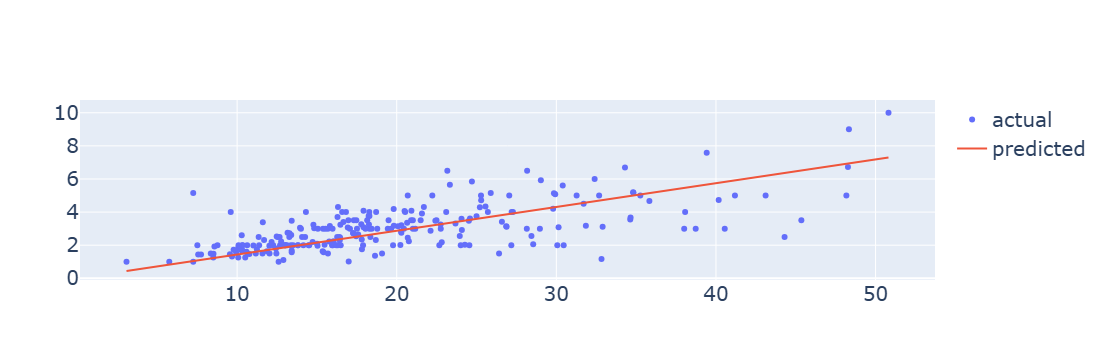

In [60]:
# summarize how good the model is
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['tip'],
                         mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction'],
                         mode = 'lines', name = 'predicted'))
fig.update_layout(font_size = 20)
# note: overlaying two plots on one pair of axes requires us to use this sort of code

In [61]:
# get coefficients and intercept from our sklearn model
f.coef_

array([0.1437319])

In [62]:
f.intercept_
# we told the model intercept to be zero.

0.0

In [63]:
# fit with intercept
f_w_int = linear_model.LinearRegression(fit_intercept = True)
f_w_int.fit(features,tip)

LinearRegression()

In [64]:
f_w_int.predict([[100]])
# different from f.predict([[100]])

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([11.42272135])

In [65]:
f_w_int.predict([[0]])

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([0.92026961])

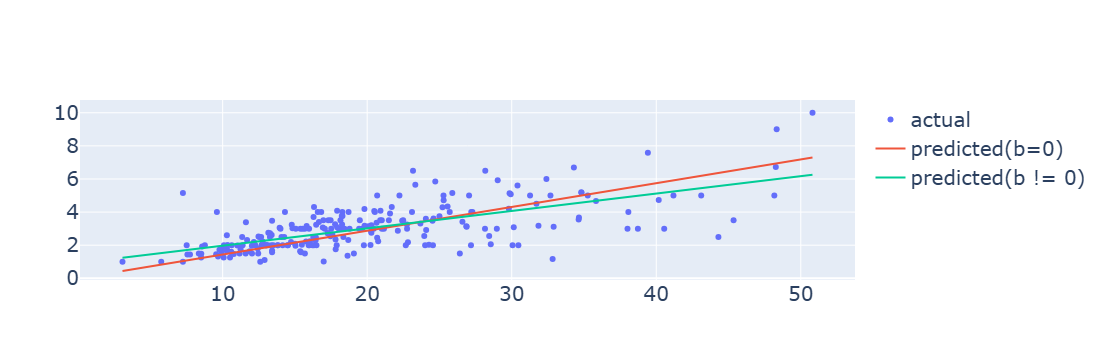

In [66]:
data['prediction_with_intercept'] = f_w_int.predict(data[['total_bill']])
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['tip'],
                         mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction'],
                         mode = 'lines', name = 'predicted(b=0)'))
fig.add_trace(go.Scatter(x=data['total_bill'], y = data['prediction_with_intercept'],
                         mode = 'lines', name = 'predicted(b != 0)'))
fig.update_layout(font_size = 20)

In [67]:
f_w_int.coef_

array([0.10502452])

In [68]:
f_w_int.intercept_

0.9202696135546731

In [69]:
# Our new model is predicting the tip is 0.1050*total_bill+0.92. In other works that humans tip 
# 92 cents, then add a 10.5 percent tip on top.
Or in x/y notation, our two models are:
1. y = 0.1437x
2. y = 0.92 + 0.105x

SyntaxError: invalid decimal literal (71371134.py, line 4)

In [70]:
# Loss Functions

In [71]:
# Computing the L2 Loss and MSE

In [72]:
data = sns.load_dataset('tips')
data['prediction'] = f.predict(data[['total_bill']])
data.head(5)

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367


In [73]:
# add loss to the dataframe
data['l2_loss'] = (data['tip'] - data['prediction']) ** 2
data.head(5)

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,2.050638
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,0.030211
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,0.230585
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,0.008756
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,0.005720


In [74]:
# compute the mean
np.mean(data['l2_loss'])

1.1781161154513171

In [75]:
data['l2_loss'].mean()

1.1781161154513171

In [76]:
# To calculate the mean squared error in practice, use the mean squared error function provided by sklean.metrics

In [77]:
## or we can compute .MSE directly from the outcome and predictions using mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(data['tip'],f.predict(data[['total_bill']]))

1.1781161154513171

In [78]:
mean_squared_error(data['tip'],data['prediction'])

1.1781161154513171

In [79]:
# Understanding that MSE is a Function of Oe Variable (Theta)

In [80]:
data

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,2.050638
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,0.030211
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,0.230585
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,0.008756
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,0.005720
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.172537,3.053627
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.906633,3.635249
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.258402,1.583576
242,17.82,1.75,Male,No,Sat,Dinner,2,2.561302,0.658212


In [81]:
# replace the prediction column and L2 loss columns with the corresponding values for 20% tip
data['prediction'] = data['total_bill'] * 0.2
data['l2_loss'] = (data['prediction'] - data['tip'])**2
data

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,3.398,5.702544
1,10.34,1.66,Male,No,Sun,Dinner,3,2.068,0.166464
2,21.01,3.50,Male,No,Sun,Dinner,3,4.202,0.492804
3,23.68,3.31,Male,No,Sun,Dinner,2,4.736,2.033476
4,24.59,3.61,Female,No,Sun,Dinner,4,4.918,1.710864
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.806,0.012996
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.436,11.806096
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.534,6.421156
242,17.82,1.75,Male,No,Sat,Dinner,2,3.564,3.290596


In [82]:
# compute the mean_squared_error for 20% tip
mean_squared_error(data['prediction'], data['tip'])

2.667486278688525

In [83]:
# computer error for a 20% tip on one line (without creating prediction and l2 loss column)
mean_squared_error(data['total_bill'] * 0.2, data['tip'])

2.667486278688525

In [84]:
mean_squared_error(data['total_bill'] * 0.08, data['tip'])

3.08881276852459

In [85]:
mean_squared_error(data['total_bill'] * 0.3, data['tip'])

12.66543732377049

In [86]:
# define a function mse_given_theta as a function which takes theto 
# and compute MSE
def mse_given_theta(theta):
    return mean_squared_error(data['total_bill'] * theta, data['tip'])

In [87]:
mse_given_theta(0.3)

12.66543732377049

In [88]:
mse_given_theta(0.2)

2.667486278688525

In [89]:
# create a list of thetas
thetas = np.linspace(0.1,0.2,100)
thetas

array([0.1       , 0.1010101 , 0.1020202 , 0.1030303 , 0.1040404 ,
       0.10505051, 0.10606061, 0.10707071, 0.10808081, 0.10909091,
       0.11010101, 0.11111111, 0.11212121, 0.11313131, 0.11414141,
       0.11515152, 0.11616162, 0.11717172, 0.11818182, 0.11919192,
       0.12020202, 0.12121212, 0.12222222, 0.12323232, 0.12424242,
       0.12525253, 0.12626263, 0.12727273, 0.12828283, 0.12929293,
       0.13030303, 0.13131313, 0.13232323, 0.13333333, 0.13434343,
       0.13535354, 0.13636364, 0.13737374, 0.13838384, 0.13939394,
       0.14040404, 0.14141414, 0.14242424, 0.14343434, 0.14444444,
       0.14545455, 0.14646465, 0.14747475, 0.14848485, 0.14949495,
       0.15050505, 0.15151515, 0.15252525, 0.15353535, 0.15454545,
       0.15555556, 0.15656566, 0.15757576, 0.15858586, 0.15959596,
       0.16060606, 0.16161616, 0.16262626, 0.16363636, 0.16464646,
       0.16565657, 0.16666667, 0.16767677, 0.16868687, 0.16969697,
       0.17070707, 0.17171717, 0.17272727, 0.17373737, 0.17474

In [90]:
# compute MSEs for those thetas
mses = [mse_given_theta(theta) for theta in thetas]
mses

[2.0777683729508194,
 2.0366887534058913,
 1.996569059699077,
 1.9574092918303747,
 1.919209449799786,
 1.8819695336073097,
 1.8456895432529465,
 1.8103694787366964,
 1.7760093400585586,
 1.7426091272185338,
 1.7101688402166224,
 1.678688479052823,
 1.6481680437271375,
 1.6186075342395636,
 1.5900069505901033,
 1.5623662927787565,
 1.5356855608055218,
 1.5099647546704,
 1.4852038743733909,
 1.461402919914495,
 1.4385618912937121,
 1.4166807885110417,
 1.3957596115664843,
 1.37579836046004,
 1.3567970351917082,
 1.3387556357614898,
 1.3216741621693837,
 1.3055526144153906,
 1.2903909924995107,
 1.2761892964217436,
 1.262947526182089,
 1.2506656817805475,
 1.2393437632171185,
 1.2289817704918033,
 1.2195797036046003,
 1.2111375625555103,
 1.2036553473445333,
 1.197133057971669,
 1.1915706944369175,
 1.1869682567402793,
 1.1833257448817533,
 1.1806431588613406,
 1.1789204986790405,
 1.1781577643348538,
 1.1783549558287796,
 1.1795120731608182,
 1.18162911633097,
 1.1847060853392344,
 1.18

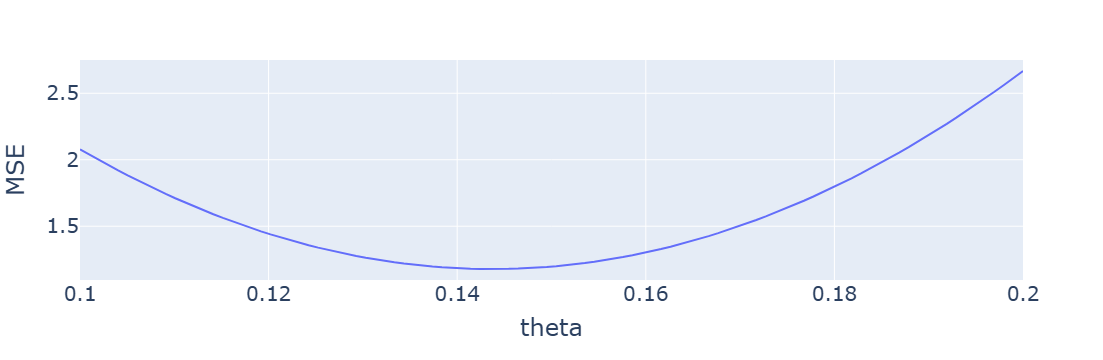

In [91]:
# to find the best theta, make a plot
# plot MSE vs theta, showing off how to set xaxis_title and yaxis_title
fig = px.line(x = thetas, y = mses)
fig.update_layout(
    xaxis_title = 'theta',
    yaxis_title = 'MSE',
    font_size = 20
)

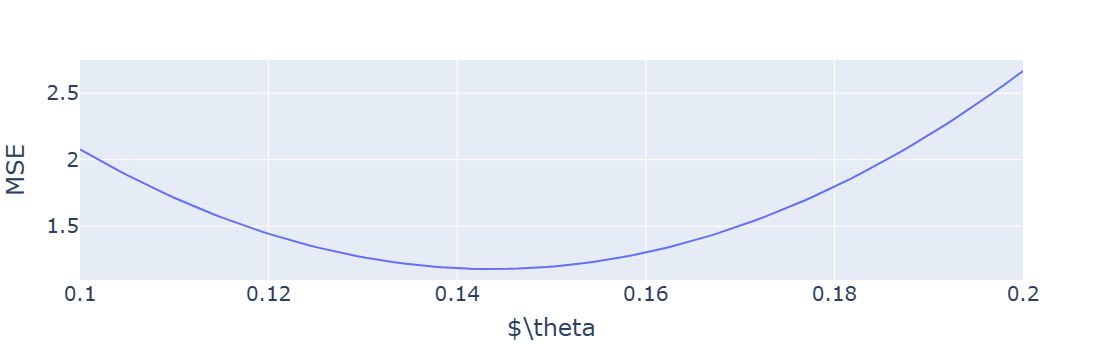

In [92]:
# to find the best theta, make a plot
# plot MSE vs theta, showing off how to set xaxis_title and yaxis_title
fig = px.line(x = thetas, y = mses)
fig.update_layout(
    xaxis_title = r'$\theta',
    yaxis_title = 'MSE',
    font_size = 20
)

In [93]:
# to find the best theta, make a plot
# plot MSE vs theta, showing off how to set xaxis_title and yaxis_title
fig = px.line(x = thetas, y = mses)
fig.update_layout(
    xaxis_title = r'$\huge(\theta)$',
    yaxis_title = 'MSE',
    font_size = 20
)

# The Plotly library supports LaTeX syntax

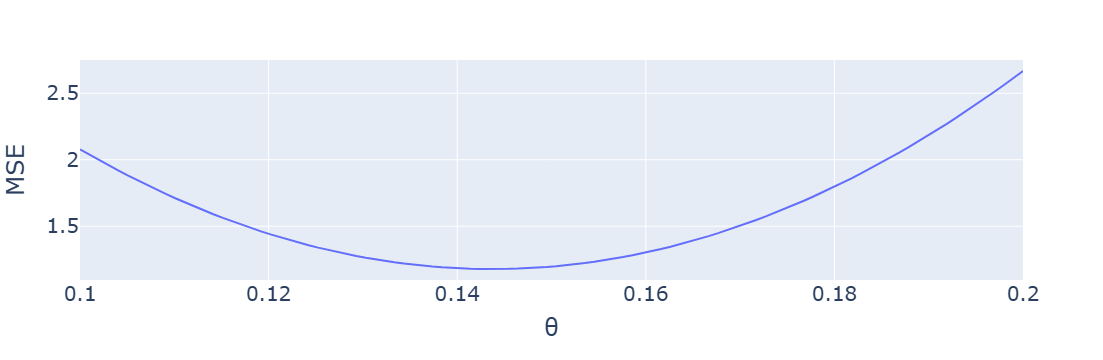

In [94]:
# to find the best theta, make a plot
# plot MSE vs theta, showing off how to set xaxis_title and yaxis_title
fig = px.line(x = thetas, y = mses)
fig.update_layout(
    xaxis_title = 'θ',
    yaxis_title = 'MSE',
    font_size = 20
)
# search from google, copy and paste

In [95]:
# The minimum mean squared error happens right where the scikit-learn model picked Theta.

In [96]:
# Using SciPy Optimize to Optimize L2 Loss

In [97]:
import scipy.optimize

In [98]:
# define g as the cube of x plus square of x minus 3 times x plus 2
def g(x):
    return x**3 + x**2 - 3*x + 2

In [99]:
g(12)

1838

In [100]:
# use scipy.optimze. minimize and compare with wolfram alpha
scipy.optimize.minimize(g, x0 = 1000)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.7316461776530541
        x: [ 7.208e-01]
      nit: 20
      jac: [ 1.788e-07]
 hess_inv: [[ 1.580e-01]]
     nfev: 48
     njev: 24

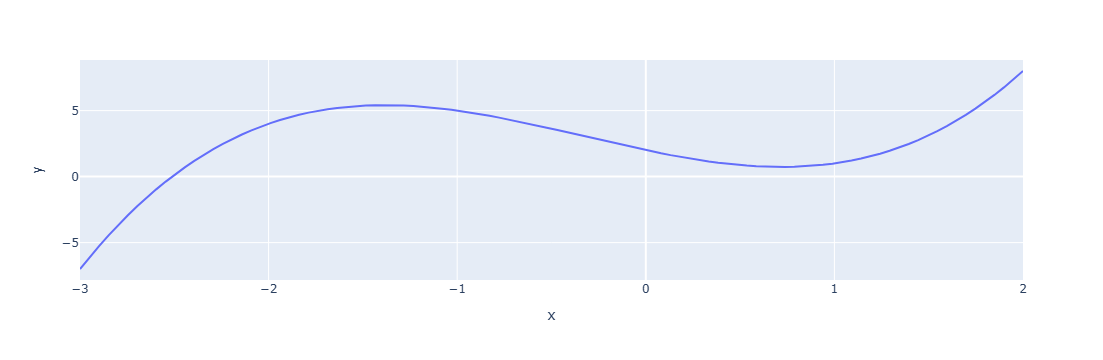

In [101]:
#visualize g
px.line(x = np.linspace(-3,2,100), y =g(np.linspace(-3,2,100)))
# When the function is plotted, we see that the minimizing value is around 0.72.

In [102]:
scipy.optimize.minimize(mse_given_theta, x0 = 0.2)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1781161154513287
        x: [ 1.437e-01]
      nit: 1
      jac: [ 2.384e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [103]:
# There are many minimization libraries that use various types of numerical techniques

In [104]:
# This minimization library can fail.
scipy.optimize.minimize(g, x0 = -3)
# The success flag comes up as False
# There is no true absolute minimum for this function
# So it will be important to pick a loss function that has a nice shape for optimization and a minimum 

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1114853117.349824
        x: [-1.037e+03]
      nit: 1
      jac: [ 3.226e+06]
 hess_inv: [[-3.206e-04]]
     nfev: 236
     njev: 112

In [105]:
# Multiple Linear Regression

In [106]:
data

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss
0,16.99,1.01,Female,No,Sun,Dinner,2,3.398,5.702544
1,10.34,1.66,Male,No,Sun,Dinner,3,2.068,0.166464
2,21.01,3.50,Male,No,Sun,Dinner,3,4.202,0.492804
3,23.68,3.31,Male,No,Sun,Dinner,2,4.736,2.033476
4,24.59,3.61,Female,No,Sun,Dinner,4,4.918,1.710864
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.806,0.012996
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.436,11.806096
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.534,6.421156
242,17.82,1.75,Male,No,Sat,Dinner,2,3.564,3.290596


In [107]:
# fit a model on total_bill and size
features = data[['total_bill', 'size']]
tip = data['tip']

f2 = linear_model.LinearRegression(fit_intercept = False)
f2.fit(features, tip)

LinearRegression(fit_intercept=False)

In [108]:
# show coefficients
f2.coef_
# two coefficients, one for 'total_bill', the other for 'size'

array([0.1007119 , 0.36209717])

In [109]:
# make a prediction for a table with $10 total bill and 3 people seated
f2.predict([[10,3]])
# predictions: f2 model: $2.09

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2.09341054])

In [110]:
# previous model f
f.predict([[10]])
# f model: $1.43

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1.43731895])

In [111]:
# the f2 model was trained on 2D data, so it can only make predictions on 2D data.

In [112]:
# If there are k parameters in a linear model, you need k features.

In [113]:
# compare preditions for f and f2 side by side in table
data['prediction'] = f.predict(data[['total_bill']])
data['prediction_2d'] = f2.predict(data[['total_bill', 'size']])                                    

In [114]:
data

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss,prediction_2d
0,16.99,1.01,Female,No,Sun,Dinner,2,2.442005,5.702544,2.435290
1,10.34,1.66,Male,No,Sun,Dinner,3,1.486188,0.166464,2.127653
2,21.01,3.50,Male,No,Sun,Dinner,3,3.019807,0.492804,3.202249
3,23.68,3.31,Male,No,Sun,Dinner,2,3.403571,2.033476,3.109052
4,24.59,3.61,Female,No,Sun,Dinner,4,3.534367,1.710864,3.924894
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,4.172537,0.012996,4.009958
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.906633,11.806096,3.461544
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.258402,6.421156,3.007333
242,17.82,1.75,Male,No,Sat,Dinner,2,2.561302,3.290596,2.518880


In [115]:
# so which is better, f or f2? You can use loss functions and compute the mean squared error(MSE)

In [118]:
# compare MSE for f and f2
mean_squared_error(data['prediction'],data['tip'])

1.1781161154513171

In [117]:
mean_squared_error(data['prediction_2d'], data['tip'])

1.06482122862577

In [ ]:
# predictions: 1D model: 1.178, 2D model: 1.065
# 2D model is better since it gets a lower mean squared error. 
# the model gave higher-quality predictions when it had more information.

In [ ]:
# Let explore what are the models acutally doing.

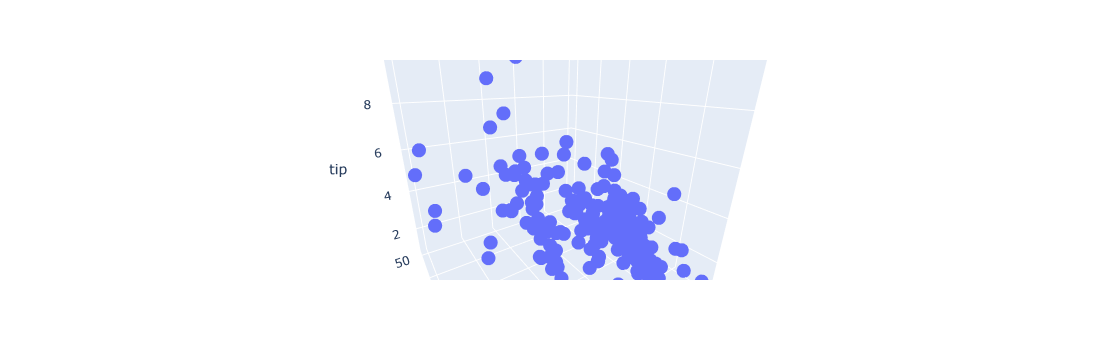

In [119]:
# make 3d plot of our data
px.scatter_3d(data, x = 'total_bill', y = 'size', z = 'tip')
# 3D plot: As the total bill goes up, the tip goes up; as the size goes up, the tip goes up.

In [120]:
# This code is not something we expect you to understand!
# It's just computing predictions for various bills and table sizes
table_bills, table_sizes = np.meshgrid(range(50), range(6))
tip_predictions = (0.1007119 * table_bills + 0.3621 * table_sizes)

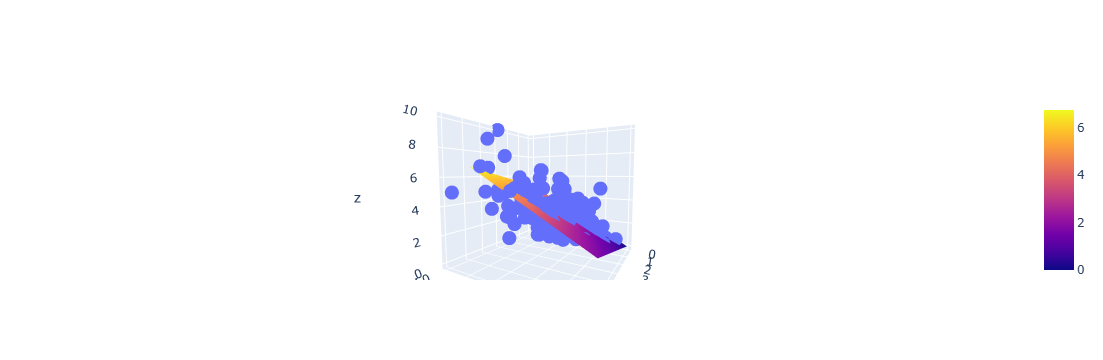

In [124]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = data['total_bill'], y = data['size'], z = data['tip'],
                           mode = 'markers', name = 'actual'))
fig.add_trace(go.Surface(x = table_bills, y = table_sizes, z = tip_predictions, name = 'predicted'))
fig.show()

# 2D plot: The plane increases with both size the the tip; the model is finding the plane of best fit

In [125]:
f.coef_

array([0.1437319])

In [126]:
f2.coef_

array([0.1007119 , 0.36209717])

In [127]:
# Our 1D and 2D models as equation
# 1. tip = 0.1437 * bill
# 2. tip = 0.1*bill + 0.36*size
# Even though model 2 has lower MSE, model 1 is probably a better model of reality.
# Model 2 is overfitting.
# Model needs to make sense.

In [ ]:
# Using Nonnumberic Features

In [128]:
data = sns.load_dataset('tips')
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [129]:
# create a copy of the dataset that only has 3 features in order to keep things simple
three_features = ['total_bill','size','day']
three_feature_data = pd.DataFrame(data[three_features])
three_feature_data.iloc[[193,90,25,26,190],:]

,total_bill,size,day
193,15.48,2,Thur
90,28.97,2,Fri
25,17.81,4,Sat
26,13.37,2,Sat
190,15.69,2,Sun


In [131]:
# Let's create 'dummies' that represent whether it is thursday, friday, saturday, or sunday
dummies = pd.get_dummies(three_feature_data['day'])
dummies.iloc[[193,90,25, 26,190], :]

,Thur,Fri,Sat,Sun
193,True,False,False,False
90,False,True,False,False
25,False,False,True,False
26,False,False,True,False
190,False,False,False,True


In [132]:
# concatenate the dummies table with three_feature_data
# pd.concat adds rows or columns to a data frame
data_w_dummies = pd.concat([three_feature_data, dummies], axis = 1)
data_w_dummies.iloc[[193,90,25,26,190],:]

,total_bill,size,day,Thur,Fri,Sat,Sun
193,15.48,2,Thur,True,False,False,False
90,28.97,2,Fri,False,True,False,False
25,17.81,4,Sat,False,False,True,False
26,13.37,2,Sat,False,False,True,False
190,15.69,2,Sun,False,False,False,True


In [ ]:
# The code below will crash since data_w_dummies includes a non-numeric feature
f_with_day = linear_model.LinearRegreassion(fit_intercept=False)
f_with_day.fit(data_w_dummies, tip)

In [133]:
# drop the non-numeric column
del data_w_dummies['day']
data_w_dummies.head(5)

,total_bill,size,Thur,Fri,Sat,Sun
0,16.99,2,False,False,False,True
1,10.34,3,False,False,False,True
2,21.01,3,False,False,False,True
3,23.68,2,False,False,False,True
4,24.59,4,False,False,False,True


In [134]:
# fit the model
f_with_day = linear_model.LinearRegression(fit_intercept=False)
f_with_day.fit(data_w_dummies, tip)

LinearRegression(fit_intercept=False)

In [135]:
# The model has been trined on numeric and nonnumeric features

In [136]:
f_with_day.coef_

array([0.09299361, 0.18713231, 0.66829361, 0.74578683, 0.62112858,
       0.73228865])

In [137]:
# Tip prediction
# Size: 3
# Total bill: $50
# Day: Thursday

In [138]:
# Computing the value using our model
# Thursday: $5.88
# Saturday: $5.83
# Sunday: $5.94

In [139]:
# What has the AI learned?

In [140]:
# Evalulating the 6D model:
# It does slightly better than the 2D and 1D models.
# Dule to overfitting, it might perform worse on new observations


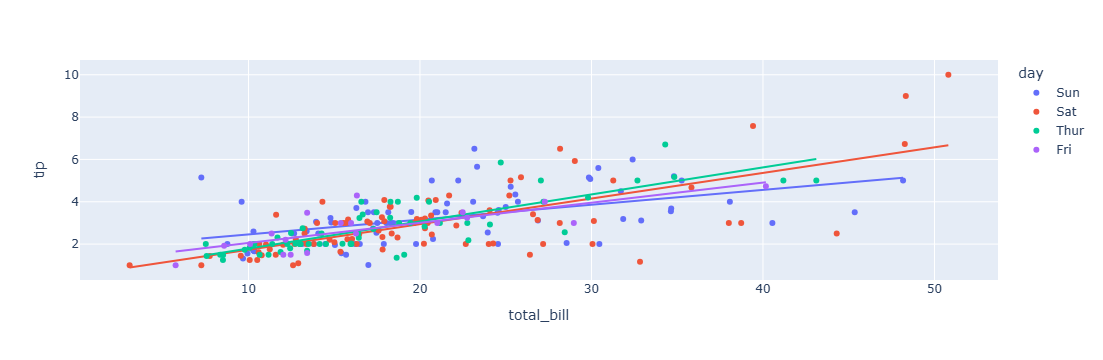

In [142]:
px.scatter(data, x='total_bill', y= 'tip', color = 'day', trendline = 'ols')